In [1]:
import pyotp
import time

## Time-based OTP example
The shared secret is typically generated by the server.

Below mocks up the client receiving the secret from the server (somehow) and storing it (hopefully securely) locally.

In [2]:
totp = pyotp.TOTP('base32secret3232')
len(totp.secret)

16

Client generates the current OTP for the current time (which is the "additional data" for time-based OTP).

https://pyauth.github.io/pyotp/#pyotp.totp.TOTP.now

In [5]:
otp = totp.now()
otp

'541901'

Verify OTP for current time (from the perspective of the server receiving an OTP from the client).

In [6]:
totp.verify(otp)

True

Wait for previous OTP to "expire".

In [7]:
time.sleep(30)

Confirm old OTP is no longer valid.

In [8]:
totp.verify(otp)

False

## QR code


In [9]:
import qrcode

In [10]:
img = qrcode.make("otpauth://totp/Secure%20App:alice%40google.com?secret=JBSWY3DPEHPK3PXP&issuer=Secure%20App")
type(img)

qrcode.image.pil.PilImage

In [11]:
img.save("qr.png")

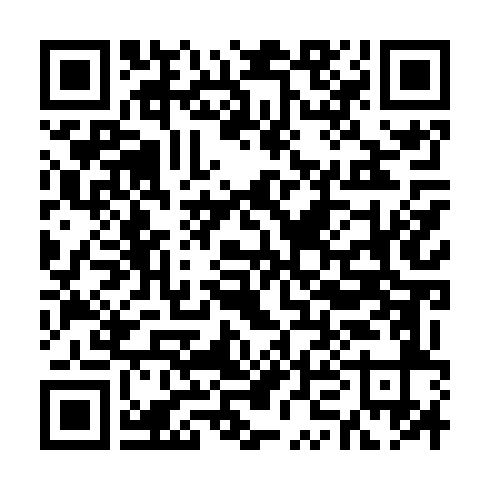

In [12]:
display(img)

## Generate a secret key
https://github.com/pyauth/pyotp?tab=readme-ov-file#generating-a-secret-key

Base32? Weird.

https://en.wikipedia.org/wiki/Base32

In [14]:
x = pyotp.random_base32()
print(x, len(x))

V2ACZJNUKAFOV7VMWRARVAT6A4T53FDJ 32


In [16]:
x = pyotp.random_hex()
print(x, len(x))

C76FEBE2AFA823873EDBAFC6CC4E830D071D4C7F 40
